In [16]:
import pandas as pd
import re
import codecs
import sys
import nltk
import numpy as np
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [ ]:
# Function to remove Stopwords
def remove_stopwords(line):
    
    stop_words = set(stopwords.words('english'))
    line = [w for w in line if not w in stop_words]
    return line

#Function to remove Punctuation and normalize characters to lowercase
def remove_punc_lower(line):
    line="".join([char for char in line if char not in string.punctuation])
    line=line.lower()
    return line

# Function to Tokenize words
def tokenize(line):
    tokens = re.split('\W+', line)
    return tokens

if __name__ == "__main__":
    input_path = 'neg.txt'
    f=open(input_path)
    pos=f.read().split('\n')
    pos_stop=[]
    pos_no_stop=[]
    for i in range (len(pos)):
        p=tokenize(remove_punc_lower(pos[i]))
        pos_no_stop.append(p)
#         p=remove_stopwords(p)
#         pos_stop.append(p)
#     train_list,val_list=train_test_split(pos_stop,train_size=0.8,random_state=0)
#     val_list,test_list=train_test_split(val_list,test_size=0.5,random_state=0)
#     np.savetxt("train.csv", train_list, delimiter=",",fmt='%s')
#     np.savetxt("val.csv", val_list, delimiter=",", fmt='%s')
#     np.savetxt("test.csv", test_list, delimiter=",", fmt='%s')
    train_list_no_stopword,val_list_no_stopword=train_test_split(pos_no_stop,train_size=0.8,random_state=0)
    val_list_no_stopword,test_list_no_stopword=train_test_split(val_list_no_stopword,test_size=0.5,random_state=0)
    np.savetxt("train_no_stopword.csv", train_list_no_stopword,delimiter=",", fmt='%s')
    np.savetxt("val_no_stopword.csv", val_list_no_stopword,delimiter=",", fmt='%s')
    np.savetxt("test_no_stopword.csv", test_list_no_stopword,delimiter=",", fmt='%s')

In [2]:
# open without stopword cleaned datasets
pos_train_no_stopword=open("../input/positive/train_no_stopword.csv")
pos_val_no_stopword=open("../input/positive/val_no_stopword.csv")
pos_test_no_stopword=open("../input/positive/test_no_stopword.csv")

neg_train_no_stopword=open("../input/negative/train_no_stopword.csv")
neg_val_no_stopword=open("../input/negative/val_no_stopword.csv")
neg_test_no_stopword=open("../input/negative/test_no_stopword.csv")

# Read without stopword cleaned datasets by line
pos_nostop_train=pos_train_no_stopword.read().split('\n')
pos_nostop_val=pos_val_no_stopword.read().split('\n')
pos_nostop_test=pos_test_no_stopword.read().split('\n')
neg_nostop_train=neg_train_no_stopword.read().split('\n')
neg_nostop_val=neg_val_no_stopword.read().split('\n')
neg_nostop_test=neg_test_no_stopword.read().split('\n')
# Convert without stopword cleaned datasets to DataFrame
pos_nostop_train= pd.DataFrame(pos_nostop_train, columns=["Clean_text"])
pos_nostop_val= pd.DataFrame(pos_nostop_val, columns=["Clean_text"])
pos_nostop_test= pd.DataFrame(pos_nostop_test, columns=["Clean_text"])
neg_nostop_train= pd.DataFrame(neg_nostop_train, columns=["Clean_text"])
neg_nostop_val= pd.DataFrame(neg_nostop_val, columns=["Clean_text"])
neg_nostop_test= pd.DataFrame(neg_nostop_test, columns=["Clean_text"])
# Add a new column 'Sentiment'
pos_nostop_train["Sentiment"]=1
pos_nostop_val["Sentiment"]=1
pos_nostop_test["Sentiment"]=1
neg_nostop_train["Sentiment"]=0
neg_nostop_val["Sentiment"]=0
neg_nostop_test["Sentiment"]=0
# Combine all the datasets above 
nostop= shuffle(pd.concat([pos_nostop_train, neg_nostop_train,pos_nostop_val,neg_nostop_val,pos_nostop_test, neg_nostop_test]))

In [3]:
nostop.head()

,Clean_text,Sentiment
94234,"['its', 'almost', 'the', 'kind', 'of', 'sativa...",1
95391,[''],1
36964,"['gives', 'one', 'of', 'my', 'favorite', 'head...",1
37801,"['let', 'me', 'relax', 'and', 'do', 'things', ...",1
103008,"['i', 'was', 'just', 'chilling', 'at', 'my', '...",1


/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Text(0, 0.5, 'roc_auc_score')

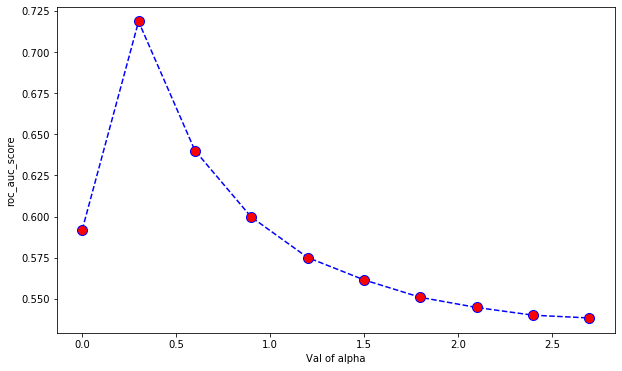

In [18]:
# Tune the parameter of alpha

#Unigram LM without stopword dataset
vectorizer = CountVectorizer(ngram_range=(1, 2))
text_counts = vectorizer.fit_transform(nostop["Clean_text"])
X=text_counts
y=nostop["Sentiment"]

# Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

rscore = []
for i in np.arange(0.0, 3.0, 0.3):
    clf = MultinomialNB(alpha=i).fit(X_train, y_train)
    proba_value = clf.predict_proba(X_test)
    p = np.array(proba_value[:, 1])
    # print("MultinomialNB Accuracy:",metrics.accuracy_score(y_nostop_val, predicted))
    y_test=np.array(y_test)
    score=roc_auc_score(y_test, p)
    rscore.append(score)

plt.figure(figsize=(10,6))
plt.plot(np.arange(0.0, 3.0, 0.3),rscore, color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('Val of alpha')
plt.ylabel('roc_auc_score')

In [19]:
# Bigram LM without stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(2, 2))
text_counts = vectorizer.fit_transform(nostop["Clean_text"])
X=text_counts
y=nostop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.3).fit(X_train, y_train)

proba_value = clf.predict_proba(X_test)
p = proba_value[:, 1]
print("Bigram LM without stopword dataset MultinomialNB =========== ROC-AUC score: %.3f" % roc_auc_score(y_test, p))

Bigram LM without stopword dataset MultinomialNB =========== ROC-AUC score: 0.706


# Gensim Word2Vec Implementation:

In [8]:
from time import time  # To time our operations
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec

In [11]:
text_with_stop=nostop['Clean_text']

In [12]:
# Creates the relevant phrases from the list of sentences:
phrases = Phrases(text_with_stop, min_count=30, progress_per=10000)
# The goal of Phraser() is to cut down memory consumption of Phrases()
# by discarding model state not strictly needed for the bigram detection task
bigram = Phraser(phrases)
#Transform the corpus based on the bigrams detected
sentences = bigram[text_with_stop]

INFO - 10:16:39: collecting all words and their counts
INFO - 10:16:39: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 10:16:43: PROGRESS: at sentence #10000, processed 2229201 words and 1089 word types
INFO - 10:16:46: PROGRESS: at sentence #20000, processed 4486869 words and 1226 word types
INFO - 10:16:50: PROGRESS: at sentence #30000, processed 6751195 words and 1377 word types
INFO - 10:16:54: PROGRESS: at sentence #40000, processed 8983036 words and 1511 word types
INFO - 10:16:57: PROGRESS: at sentence #50000, processed 11204052 words and 1648 word types
INFO - 10:17:01: PROGRESS: at sentence #60000, processed 13430896 words and 1869 word types
INFO - 10:17:05: PROGRESS: at sentence #70000, processed 15705770 words and 1936 word types
INFO - 10:17:08: PROGRESS: at sentence #80000, processed 17908526 words and 2048 word types
INFO - 10:17:12: PROGRESS: at sentence #90000, processed 20142981 words and 2123 word types
INFO - 10:17:15: PROGRESS: at sentence #100

In [13]:
sentences[1:10]

["['this', 'one', 'was', 'a', 'real', 'life', 'saver', 'today', 'helps', 'break', 'away', 'the', 'grip', 'of', 'depression', 'and', 'irritability', 'for', 'me', '']",
 "['so', 'quick', 'to', 'melt', 'away', 'the', 'stress', 'and', 'restore', 'a', 'sense', 'or', 'wellbeing', 'i', 'love', 'bb3', 'a', 'lot', 'i', 'think', 'more', 'people', 'should', 'give', 'it', 'a', 'whirl', 'and', 'see', 'if', 'you', 'too', 'wont', 'cozy', 'up', 'to', 'bruce', '']",
 "['this', 'strain', 'is', 'extremely', 'potent', 'the', 'name', 'electric', 'lemonade', 'does', 'not', 'give', 'it', 'justice', 'this', 'is', 'a', 'heavy', 'hitter', 'because', 'of', 'the', 'tahoe', 'og', 'one', 'of', 'the', 'strongest', 'strains', 'the', 'taste', 'is', 'lemonade', 'with', 'some', 'blue', 'dream', 'the', 'strongest', 'indicalike', 'sativa', 'ive', 'ever', 'had', 'very', 'interesting', 'strain', 'that', 'is', 'a', 'must', 'try']",
 "['one', 'of', 'my', 'favorites', 'for', 'going', 'out', 'and', 'having', 'fun', 'must', 'try

In [14]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [15]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 10:18:40: collecting all words and their counts
WARNING - 10:18:40: Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
INFO - 10:18:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 10:18:41: PROGRESS: at sentence #10000, processed 2229201 words, keeping 63 word types
INFO - 10:18:41: PROGRESS: at sentence #20000, processed 4486869 words, keeping 67 word types
INFO - 10:18:41: PROGRESS: at sentence #30000, processed 6751195 words, keeping 85 word types
INFO - 10:18:42: PROGRESS: at sentence #40000, processed 8983036 words, keeping 109 word types
INFO - 10:18:42: PROGRESS: at sentence #50000, processed 11204483 words, keeping 127 word types
INFO - 10:18:42: PROGRESS: at sentence #60000, processed 13431364 words, keeping 140 word types
INFO - 10:18:42: PROGRESS: at sentence #70000, processed 15706211 words, keeping 148 word types
INFO - 10:18:43: PROGRESS: at sentence #80000, process

Time to build vocab: 0.12 mins


In [16]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 10:19:34: training model with 3 workers on 79 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 10:19:35: EPOCH 1 - PROGRESS: at 6.45% examples, 140418 words/s, in_qsize 6, out_qsize 0
INFO - 10:19:36: EPOCH 1 - PROGRESS: at 13.32% examples, 145441 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:37: EPOCH 1 - PROGRESS: at 20.71% examples, 149777 words/s, in_qsize 4, out_qsize 2
INFO - 10:19:38: EPOCH 1 - PROGRESS: at 31.26% examples, 169754 words/s, in_qsize 6, out_qsize 3
INFO - 10:19:39: EPOCH 1 - PROGRESS: at 40.34% examples, 175376 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:40: EPOCH 1 - PROGRESS: at 48.57% examples, 176221 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:41: EPOCH 1 - PROGRESS: at 57.00% examples, 177366 words/s, in_qsize 5, out_qsize 0
INFO - 10:19:42: EPOCH 1 - PROGRESS: at 64.39% examples, 175038 words/s, in_qsize 5, out_qsize 1
INFO - 10:19:43: EPOCH 1 - PROGRESS: at 75.49% examples, 182324 words/s, in_qsize 5, out_qsiz

INFO - 10:20:41: EPOCH 7 - PROGRESS: at 43.16% examples, 187363 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:42: EPOCH 7 - PROGRESS: at 52.05% examples, 188591 words/s, in_qsize 5, out_qsize 1
INFO - 10:20:43: EPOCH 7 - PROGRESS: at 62.08% examples, 192738 words/s, in_qsize 5, out_qsize 4
INFO - 10:20:44: EPOCH 7 - PROGRESS: at 71.53% examples, 194065 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:45: EPOCH 7 - PROGRESS: at 80.99% examples, 195235 words/s, in_qsize 4, out_qsize 4
INFO - 10:20:46: EPOCH 7 - PROGRESS: at 89.95% examples, 195229 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:47: EPOCH 7 - PROGRESS: at 97.63% examples, 192755 words/s, in_qsize 5, out_qsize 0
INFO - 10:20:47: worker thread finished; awaiting finish of 2 more threads
INFO - 10:20:47: worker thread finished; awaiting finish of 1 more threads
INFO - 10:20:47: worker thread finished; awaiting finish of 0 more threads
INFO - 10:20:47: EPOCH - 7 : training on 55751519 raw words (2178236 effective words) took 11.3s

Time to train the model: 1.74 mins
